# Word Representation

### One Hot Vector를 통한 출력

In [28]:
from konlpy.tag import Mecab

qna_data = [
                ['안녕', '만나서 반가워']
                ,['넌누구니', '나는 AI 봇이란다.']
#                 ,['피자 주문 할께', '페파로니 주문해줘']
#                ,['음료는 멀로', '콜라로 해줘']
            ]
mecab = Mecab('/usr/local/lib/mecab/dic/mecab-ko-dic')

train_data = list(map(lambda x : mecab.morphs(' '.join(x)) , qna_data))

import itertools
train_data = list(itertools.chain.from_iterable(train_data))
#train_data = list(set(train_data))

print(list(train_data))

['안녕', '만나', '서', '반가워', '넌', '누구', '니', '나', '는', 'AI', '봇', '이', '란다', '.']


In [29]:
import numpy as np
bucket = np.zeros(len(train_data), dtype=np.float)

for word in train_data :
    bucket_temp = bucket.copy()
    np.put(bucket_temp, train_data.index(word), 1)
    print(bucket_temp)

[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]


## Word to Vector (By Gensim)
### W2V를 통해 출력해보자

In [30]:
from gensim.models import word2vec

In [31]:
train_data = [train_data]
print(train_data)

model = word2vec.Word2Vec(size=50, window=2, min_count=1)
model.build_vocab(train_data)
model.train(train_data)
print("model check : {0}".format(model))

[['안녕', '만나', '서', '반가워', '넌', '누구', '니', '나', '는', 'AI', '봇', '이', '란다', '.']]
model check : Word2Vec(vocab=14, size=50, alpha=0.025)


In [32]:
import os  
file_path = './model'
if not os.path.exists(file_path):
    os.makedirs(file_path)
model.save(file_path + "/w2v.bin")
model = word2vec.Word2Vec.load("./model/w2v.bin")
print("model load check : {0}".format(model))

model load check : Word2Vec(vocab=14, size=50, alpha=0.025)


In [33]:
X = model[vocab]
print(model.wv.index2word)

['나', 'AI', '는', '만나', '반가워', '봇', '이', '넌', '누구', '니', '란다', '서', '.', '안녕']


### 안녕, AI등 값의 Vector값 출력 

In [34]:
print(model['안녕'])

[  7.77189340e-03   1.70843513e-03  -1.64006103e-03   1.55417644e-03
   3.85253155e-03   3.07371141e-03  -9.99567192e-03  -5.99309430e-03
   6.09431183e-03   7.20251119e-03  -9.56873037e-03  -1.66168611e-04
   6.89350488e-03  -7.95861799e-03  -3.01730307e-03   4.22539096e-03
  -4.03267331e-04   7.43198534e-03   1.93629053e-03   3.84011865e-03
  -4.40375553e-03   4.89712867e-04   1.29563361e-03   6.95453631e-03
   5.84286638e-04  -3.47057299e-04  -9.42543242e-03  -6.99008699e-04
  -4.61000344e-03   3.26047069e-03  -8.13240767e-04  -5.87378070e-03
   8.02986603e-03  -4.56168200e-05   3.28822341e-03   6.24947436e-03
   2.37251562e-03  -7.89792556e-03   4.45860531e-03   2.24038633e-03
  -6.83937082e-03  -5.43891778e-03   6.25599734e-03   4.37231082e-03
   7.96796381e-03   7.31740613e-03   1.30903663e-03  -6.69111405e-03
  -2.59039737e-03   3.26964981e-03]


In [35]:
print(model['AI'])

[ -5.62967313e-03   9.18789115e-03   5.59353875e-03  -5.38062397e-03
   8.48041754e-03  -2.00670585e-03   4.99563524e-03  -9.52430908e-03
   5.78262703e-03  -6.55566761e-03   6.17869431e-03   7.64077436e-03
   1.19277497e-03   9.07240319e-05  -7.34363124e-03  -4.21604700e-03
   3.44319997e-04  -1.43316094e-04  -4.23561130e-03  -8.13846197e-03
   6.59779087e-03   5.28146233e-03   8.93006939e-03  -3.70573206e-03
  -6.98284851e-03   2.37091002e-03   4.97481560e-05  -7.25757889e-03
  -9.05923080e-03   2.83592753e-03  -5.22093242e-03   5.32599341e-04
  -2.87164887e-03  -9.87755600e-03   7.11277639e-03  -7.17759458e-03
  -2.86495010e-03   6.83844555e-03   9.44867358e-03  -7.27016758e-03
   9.21626575e-03  -9.19661205e-03  -5.62731363e-03   1.23981922e-03
  -1.90784095e-03  -9.94954538e-03  -4.82159480e-03  -5.62058017e-03
  -6.29771035e-03  -2.75912636e-04]


In [36]:
result1 = model.most_similar(positive='나', negative='', topn=10)
print(result1)

[('넌', 0.19819065928459167), ('AI', 0.12397297471761703), ('반가워', 0.07913319021463394), ('누구', 0.06107105687260628), ('봇', 0.03421507775783539), ('.', 0.026113495230674744), ('란다', 0.01540888100862503), ('만나', -0.008922268636524677), ('는', -0.05199623852968216), ('안녕', -0.06054110825061798)]


           x             y word
0   0.000140  3.522124e-05    나
1   0.000062  1.374288e-04   AI
2   0.000002  3.776281e-05    는
3   0.000011  9.977713e-05   만나
4  -0.000105  1.737288e-05  반가워
5   0.000019 -3.488319e-05    봇
6   0.000004 -3.250974e-05    이
7   0.000060 -1.150031e-04    넌
8   0.000040 -2.872377e-07   누구
9   0.000158 -4.322912e-05    니
10 -0.000057  2.554692e-05   란다
11  0.000137 -1.316822e-04    서
12 -0.000097  2.442855e-05    .
13  0.000137  2.276279e-05   안녕


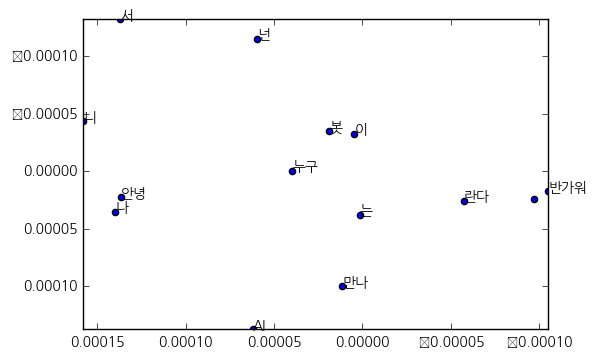

In [37]:
from sklearn.manifold import TSNE
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt


font_name = matplotlib.font_manager.FontProperties(
                fname="/usr/share/fonts/truetype/nanum/NanumGothic.ttf"  # 한글 폰트 위치를 넣어주세요
            ).get_name()
vocab = model.wv.index2word
matplotlib.rc('font', family=font_name)
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X) #t-분포 확률적 임베딩(t-SNE)은 데이터의 차원 축소에 사용
df = pd.concat([pd.DataFrame(X_tsne),
                pd.Series(vocab)],
               axis=1)

df.columns = ['x', 'y', 'word']
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
print(df)
ax.scatter(df['x'], df['y'])
ax.set_xlim(df['x'].max(), df['x'].min())
ax.set_ylim(df['y'].max(), df['y'].min())
for i, txt in enumerate(df['word']):
    ax.annotate(txt, (df['x'].iloc[i], df['y'].iloc[i]))
plt.show()